In [1]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

类别： Counter({0: 9900, 1: 100})


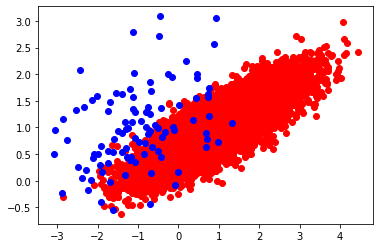

In [2]:
# 1 生成数据集
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)

counter = Counter(y) # 统计类别数量

print("类别：", counter)

# 可视化显示
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

counter_2 :  Counter({0: 9900, 1: 9900})


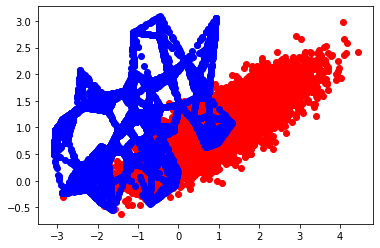

In [4]:
# 2 利用SMOTE技术处理样本不平衡
# 注意：需要安装：imblance，pip3 install imblearn

from imblearn.over_sampling import SMOTE
# 创建对象
smote = SMOTE()

# 综合生成数据
X_new, y_new = smote.fit_resample(X, y)

counter_2 = Counter(y_new)
print("counter_2 : ", counter_2)

# 可视化显示
plt.scatter(X_new[y_new==0,0], X_new[y_new==0,1], color='r')
plt.scatter(X_new[y_new==1,0], X_new[y_new==1,1], color='b')
plt.show()

类别： Counter({0: 1980, 1: 990})


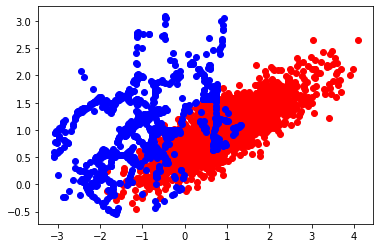

In [8]:
# 3 对少数类进行SMOTE，对多数类进行random undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.1) # 10%
under = RandomUnderSampler(sampling_strategy=0.5) # 50%

# 使用pipeline
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)

X_new_2, y_new_2 = pipeline.fit_resample(X, y)

count_3 = Counter(y_new_2)
print("类别：", count_3)

# 可视化显示
plt.scatter(X_new_2[y_new_2==0,0], X_new_2[y_new_2==0,1], color='r')
plt.scatter(X_new_2[y_new_2==1,0], X_new_2[y_new_2==1,1], color='b')
plt.show()